In [15]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

In [16]:
data_test = pd.read_csv('./data/BTC_day_test.csv')

data_test = data_test.drop(columns=[data_test.columns[0], 'Time'])

data_test.head()

,Count,Close,Volume,VWAP,DeltaPrice,Zscore
0,5245264.0,36853.776250,254899.781852,36785.026600,-2334.466607,0.283444
1,4035430.0,35884.194286,174589.020944,35920.637885,-969.581964,-0.191312
2,3698231.0,35924.745714,162424.239185,35892.636068,40.551429,-0.293085
3,3329228.0,36767.647143,143617.525589,36759.579332,842.901429,-0.052462
4,3697336.0,35678.465000,161577.522564,35807.521852,-1089.182143,-0.758468


In [17]:
data_test.describe()

,Count,Close,Volume,VWAP,DeltaPrice,Zscore
count,2.210000e+02,221.000000,221.000000,221.000000,221.000000,221.000000
mean,4.104950e+06,44932.853419,159799.520674,44927.064373,35.016542,0.177627
std,1.844856e+06,9576.762540,86872.686584,9569.880463,1981.301114,1.568300
min,1.434812e+06,29783.307143,47421.907033,29786.169929,-7482.620357,-4.337429
25%,2.995718e+06,35678.465000,102141.310329,35706.213376,-1016.364286,-0.931109
50%,3.727160e+06,45922.092857,142620.412100,45909.203400,-25.817143,0.233382
75%,4.879837e+06,54110.021429,183437.101027,54126.080298,1143.892857,1.276738
max,1.607421e+07,63641.857500,784887.703675,63632.987020,7771.607500,4.447292


In [18]:
act_dp = data_test['DeltaPrice'].to_list()

print(max(act_dp), min(act_dp))

# max_val = round(max(act_dp))
max_val = 3



7771.607500000005 -7482.620357142856


In [19]:

act_dp1 = act_dp.copy()
act_dp1 = act_dp1[1:]
# act_dp1 = act_dp1.reset_index(drop=True)

pred_dp1 = act_dp[0:-1]
# pred_dp1 = pred_dp1.reset_index(drop=True)

print(len(act_dp1), len(pred_dp1))

220 220


In [20]:
act_dp

[-2334.466607142851,
 -969.5819642857168,
 40.55142857142346,
 842.9014285714366,
 -1089.1821428571493,
 -123.28214285714056,
 -4904.085357142856,
 2230.5510714285665,
 -881.1185714285675,
 241.6437500000029,
 -245.0350000000035,
 563.4362500000025,
 -2043.799285714289,
 2896.0892857142862,
 918.8650000000052,
 -119.43571428571886,
 -753.2442857142814,
 2049.972857142849,
 2216.7542857142835,
 -673.8514285714191,
 1304.112857142849,
 584.3751785714267,
 -81.71374999999534,
 7771.607500000005,
 -76.91892857144558,
 -1674.3999999999942,
 3223.5800000000017,
 -636.8271428571315,
 -246.13142857143248,
 1438.6028571428617,
 -764.2371428571569,
 1373.6528571428717,
 2961.251428571435,
 -605.258571428596,
 4378.342857142881,
 -90.13000000001192,
 1582.8628571428562,
 -3384.6757142857023,
 -5139.338571428576,
 809.5699999999997,
 -2825.79714285714,
 -621.3533588571663,
 -379.26521257141576,
 3669.2085714285713,
 -1266.2382142857095,
 1836.0021118857112,
 -1862.6912351571373,
 583.3287661285649

In [21]:
act_dp1

[-969.5819642857168,
 40.55142857142346,
 842.9014285714366,
 -1089.1821428571493,
 -123.28214285714056,
 -4904.085357142856,
 2230.5510714285665,
 -881.1185714285675,
 241.6437500000029,
 -245.0350000000035,
 563.4362500000025,
 -2043.799285714289,
 2896.0892857142862,
 918.8650000000052,
 -119.43571428571886,
 -753.2442857142814,
 2049.972857142849,
 2216.7542857142835,
 -673.8514285714191,
 1304.112857142849,
 584.3751785714267,
 -81.71374999999534,
 7771.607500000005,
 -76.91892857144558,
 -1674.3999999999942,
 3223.5800000000017,
 -636.8271428571315,
 -246.13142857143248,
 1438.6028571428617,
 -764.2371428571569,
 1373.6528571428717,
 2961.251428571435,
 -605.258571428596,
 4378.342857142881,
 -90.13000000001192,
 1582.8628571428562,
 -3384.6757142857023,
 -5139.338571428576,
 809.5699999999997,
 -2825.79714285714,
 -621.3533588571663,
 -379.26521257141576,
 3669.2085714285713,
 -1266.2382142857095,
 1836.0021118857112,
 -1862.6912351571373,
 583.3287661285649,
 75.03285714286176,

In [22]:
pred_dp1

[-2334.466607142851,
 -969.5819642857168,
 40.55142857142346,
 842.9014285714366,
 -1089.1821428571493,
 -123.28214285714056,
 -4904.085357142856,
 2230.5510714285665,
 -881.1185714285675,
 241.6437500000029,
 -245.0350000000035,
 563.4362500000025,
 -2043.799285714289,
 2896.0892857142862,
 918.8650000000052,
 -119.43571428571886,
 -753.2442857142814,
 2049.972857142849,
 2216.7542857142835,
 -673.8514285714191,
 1304.112857142849,
 584.3751785714267,
 -81.71374999999534,
 7771.607500000005,
 -76.91892857144558,
 -1674.3999999999942,
 3223.5800000000017,
 -636.8271428571315,
 -246.13142857143248,
 1438.6028571428617,
 -764.2371428571569,
 1373.6528571428717,
 2961.251428571435,
 -605.258571428596,
 4378.342857142881,
 -90.13000000001192,
 1582.8628571428562,
 -3384.6757142857023,
 -5139.338571428576,
 809.5699999999997,
 -2825.79714285714,
 -621.3533588571663,
 -379.26521257141576,
 3669.2085714285713,
 -1266.2382142857095,
 1836.0021118857112,
 -1862.6912351571373,
 583.3287661285649

In [23]:
# pred_dp2 = []

# for i in range(0, len(act_dp1)):
#         if (i == 0):
#                 pred_dp2.append(act_dp1[i])
#         else: 
#                 pred_val = act_dp1 [i - 1] +  random.randint(-max_val, max_val)
#                 pred_dp2.append(pred_val)
                

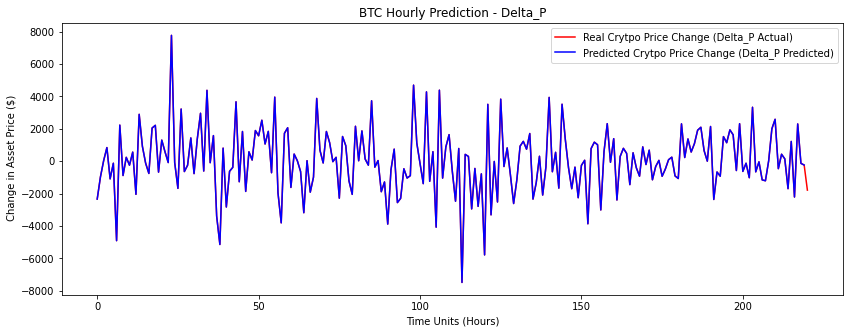

In [24]:
plt.figure(figsize=(14,5))
plt.plot(act_dp, color = 'red', label = 'Real Crytpo Price Change (Delta_P Actual)')
plt.plot(pred_dp1, color = 'blue', label = 'Predicted Crytpo Price Change (Delta_P Predicted)')
plt.title('BTC Hourly Prediction - Delta_P')
plt.xlabel('Time Units (Hours)')
plt.ylabel(' Change in Asset Price ($)')
plt.legend()
plt.show()

In [25]:
pred_list = []
price_list = []

close = data_test['Close'].to_list()

count = 0
for i in range(0, len(close) - 1):

    prediction = close[i] + act_dp1 [count]
    price = close[i] + pred_dp1 [count]
    
    pred_list.append(prediction)
    price_list.append(price)
    
    count = count + 1

In [26]:
diff_sq_sum = 0
for i in range(0, len(price_list)):
    diff = price_list[i] - pred_list[i]
    diff_sq = diff * diff
    diff_sq_sum = diff_sq_sum + diff_sq
    
RMSE = math.sqrt(diff_sq_sum/len(price_list))
    
print("Root Mean Squared Error (RMSE):", RMSE)

Root Mean Squared Error (RMSE): 2971.004571677175


In [27]:
diff_sum = 0
for i in range(0, len(price_list)):
    diff = abs((price_list[i] - pred_list[i]) / price_list [i])
    diff_sum = diff_sum + diff
    
MAPE = diff_sum/len(price_list)
    
print("Mean Absolue Percentage Error (MAPE):", MAPE)

Mean Absolue Percentage Error (MAPE): 0.05319994604570106


In [28]:
dir_match_count = 0
price_diff = 0
pred_diff = 0
for i in range(1, len(price_list)):
    
    price_diff = price_list [i] - price_list[i - 1]
    pred_diff = pred_list[i] - pred_list[i - 1]
    
    if np.sign(price_diff) == np.sign(pred_diff):
        dir_match_count = dir_match_count + 1

correct_dir_perc = dir_match_count/(len(price_list) - 1)
        
print("Correct Direction Prediction Accuracy:", correct_dir_perc)

Correct Direction Prediction Accuracy: 0.4246575342465753
